## Data Pre-Processing
I am following the methodology outlined in this [paper](https://www.researchgate.net/publication/388255558_Exploring_the_Effectiveness_of_Machine_Learning_and_Deep_Learning_Techniques_for_EEG_Signal_Classification_in_Neurological_Disorders) which I will be referencing a lot.

- Channel renaming (if necessary)
- Downsampling 
- Re-dimensioning (possibly for adding additional data if necessary)
- Channel removal

# Loading Data
- Below we can see a sample script for creating an instance of ```RawBrainVision```
- Important Note: do not rename ```.eeg```, ```.vhdr```, or ```.vmark``` files! 
- because you must pass the ```.vhdr``` header file as an arg to instantiate the ```RawBrainVision``` object, changing the file names can cause issues. 

In [ ]:
import mne

#I only had space in my E: drive haha
vhdr = r"E:\neuro_data\ds004796\sub-01\eeg\sub-01_task-rest_eeg.vhdr"

#instatiate
sub_01 = mne.io.read_raw_brainvision(vhdr, preload=True)

#show object info. Note there seems to be no projections so I will not be able to make topomaps :(
sub_01.info

Extracting parameters from E:\neuro_data\ds004796\sub-01\eeg\sub-01_task-rest_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 661519  =      0.000 ...   661.519 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 127 EEG
 custom_ref_applied: False
 dig: 130 items (3 Cardinal, 127 EEG)
 highpass: 0.0 Hz
 lowpass: 280.0 Hz
 meas_date: 2021-05-13 15:14:47 UTC
 nchan: 127
 projs: []
 sfreq: 1000.0 Hz
>

# Channel Renaming
- As you can see above, this data contains 127 channels.
- This is a high resolution but non-standard system that contains the standard 10-20 montage along with high density extensions
- the montage (naming structure) is stored in the  ```.vhdr``` file and the digitized montage (CapTrak 3D coordinates) is already read. 
- Preset montage ensures ```MNE``` knows the 3D positions of the electrodes, essential for spatial filtering, ICA, source localization etc.
- this article for more [info](https://www.nature.com/articles/s41597-024-03106-5)


[<DigPoint |        LPA : (-95.0, 0.0, 0.0) mm      : head frame>, <DigPoint |     Nasion : (0.0, 95.0, 0.0) mm       : head frame>, <DigPoint |        RPA : (95.0, 0.0, 0.0) mm       : head frame>, <DigPoint |     EEG #1 : (-29.4, 90.4, 0.0) mm     : head frame>, <DigPoint |     EEG #2 : (0.0, 67.2, 67.2) mm      : head frame>, <DigPoint |     EEG #3 : (-51.8, 63.9, 47.5) mm    : head frame>, <DigPoint |     EEG #4 : (-76.9, 55.8, 0.0) mm     : head frame>, <DigPoint |     EEG #5 : (-83.2, 27.0, -37.1) mm   : head frame>, <DigPoint |     EEG #6 : (-82.2, 33.2, 34.0) mm    : head frame>, <DigPoint |     EEG #7 : (-34.0, 35.2, 81.4) mm    : head frame>, <DigPoint |     EEG #8 : (-67.2, -0.0, 67.2) mm    : head frame>, <DigPoint |     EEG #9 : (-95.0, -0.0, 0.0) mm     : head frame>, <DigPoint |    EEG #10 : (-83.2, -27.0, -37.1) mm  : head frame>, <DigPoint |    EEG #11 : (-82.8, -31.8, 34.0) mm   : head frame>, <DigPoint |    EEG #12 : (-34.0, -35.2, 81.4) mm   : head frame>, <DigPoint

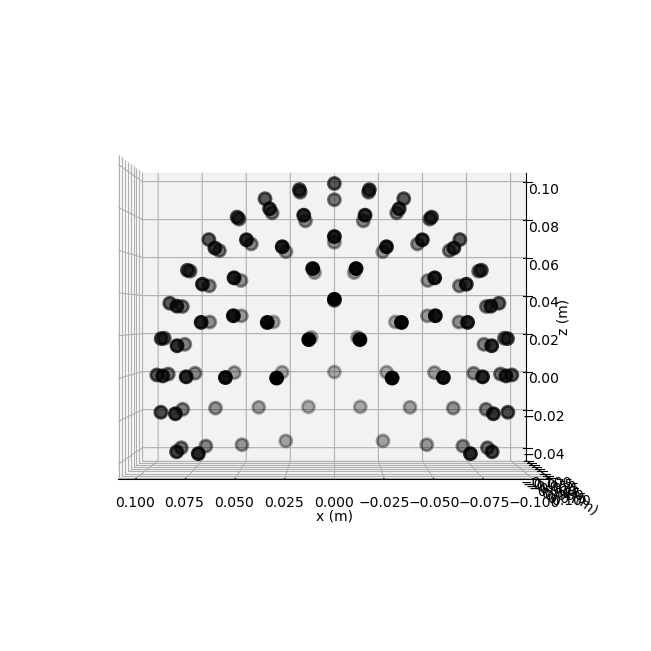

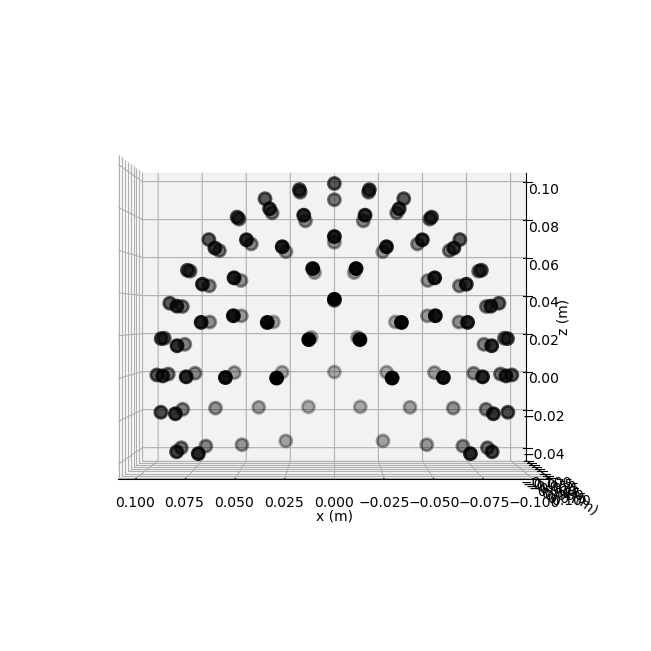

In [ ]:
#check list of digitized points (DigPoint dictionary)
print(sub_01.info['dig'])

#plot sensor layout in 3d space
sub_01.plot_sensors(kind='3d')

# Resampling
- Data is sampled at 1,000 Hz

Channels marked as bad:
none
